# House Prices
Wybrany projekt dotyczy przewidywania cen i sprzedaży domów.

Do obsługi plików potrzebny będzie moduł pandas.

In [1]:
import pandas as pd

Do określenia jakości przeprowadzonego uczenia maszynowego wykorzystane zostaną moduły

In [2]:
from sklearn.metrics import mean_squared_log_error      # miara bledu to root-mean-square-log error 
from sklearn.model_selection import train_test_split    # podzial danych na x i y

Przyjęta została miara błędu RMSLE zgodnie z zaleceniem w opisie konkursu. Wykorzystanie logarytmu powoduje, że wartości błędu będzie można porównać również w przypadku, dużej rozpiętości cen domów.  

Uczenie maszynowe prowadzone będzie w oparciu o moduły

In [3]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model.ridge import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Import danych z plików 'train.csv' oraz 'test.csv'. 
Zbiór treningowy i walidacyjny został wyodrębniony w dalszej części.

In [4]:
houses_data = pd.read_csv('data/train.csv')
houses_test_data = pd.read_csv('data/test.csv')

Wyświetlenie wszystkich nazw kolumn w zbiorach danych

In [5]:
houses_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Do uczenia modelu wybrane zostały $\textbf{niektóre kolumny}$ pełnego zbioru danych, podane w tablicy $\textit{features}$. W kolumnach, które zawierają wartości inne niż liczby, dane są reprezentowane poprzez zastąpienie ich liczbami całkowitymi. Opis poszczególnych symboli (skrótów) reprezentujących daną cechę domu znajduje się w pliku $\textit{data_secription.txt}$.

In [20]:
features = ['LotArea', 'Street', 'LandContour', 'Neighborhood', 'OverallCond', 'YearBuilt', 'ExterCond', 'Heating', 'GarageCars']

df = pd.DataFrame(houses_data)
df_test = pd.DataFrame(houses_test_data)

# dane przed zastąpieniem slow liczbami
# print("Przed obrobieniem: ")
# print(df[features].head())

streetMapping = {'Grvl': 1, 'Pave': 2}
for key in streetMapping.keys():
    df = df.replace(key, streetMapping[key])
    df_test = df_test.replace(key, streetMapping[key])

landContourMapping = {'Lvl': 1,	'Bnk': 2, 'HLS': 3, 'Low': 4}
for key in landContourMapping.keys():
    df = df.replace(key, landContourMapping[key])
    df_test = df_test.replace(key, landContourMapping[key])

neighborhoodMapping = {'Blmngtn': 1, 'Blueste': 2, 'BrDale': 3, 'BrkSide': 4, 'ClearCr': 5, 'CollgCr': 6, 'Crawfor': 7, 'Edwards': 8, 'Gilbert': 9, 'IDOTRR': 10, 'MeadowV': 11, 'Mitchel': 12, 'NAmes': 13, 'NoRidge': 14, 'NPkVill': 15, 'NridgHt': 16, 'NWAmes': 17, 'OldTown': 18, 'SWISU': 19, 'Sawyer': 20, 'SawyerW': 21, 'Somerst': 22, 'StoneBr': 23, 'Timber': 24, 'Veenker': 25}
for key in neighborhoodMapping.keys():
    df = df.replace(key, neighborhoodMapping[key])
    df_test = df_test.replace(key, neighborhoodMapping[key])

exterCondMapping = {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5}
for key in exterCondMapping.keys():
    df = df.replace(key, exterCondMapping[key])
    df_test = df_test.replace(key, exterCondMapping[key])

heatingMapping = {'Floor': 1, 'GasA': 2, 'GasW': 3, 'Grav': 4, 'OthW': 5, 'Wall': 6}
for key in heatingMapping.keys():
    df = df.replace(key, heatingMapping[key])
    df_test = df_test.replace(key, heatingMapping[key])

# dane po zamianie na liczby 
# print("Po obrobieniu (zbior do uczenia): ")
# print(df[features].head())

### Podział zbioru służącego do uczenia na zbiór treningowy i walidacyjny 

In [21]:
# zbiory x i y do uczenia oraz walidacji
houses_train_data, houses_validate_data = train_test_split(df, random_state = 0)

x_train = houses_train_data[features]
y_train = houses_train_data.SalePrice

x_valid = houses_validate_data[features]
y_valid = houses_validate_data.SalePrice


# zbior x do testowania
x_test = df_test[features]

## Uczenie modelu za pomocą zbioru treningowego przy wykorzystaniu różnych modeli 
### (DummyRegressor(), LinearRegression(), Ridge(), Lasso(), ElasticNet(), RandomForestRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor())
Każdy model został przetestowany za pomocą zbioru walidacyjnego. Do porównania wykorzystany został RMSLE.

### DummyRegressor()

In [8]:
houses_sale_model = DummyRegressor() 
houses_sale_model.fit(x_train, y_train)

y_pred = houses_sale_model.predict(x_valid)
DummyRegressorError = mean_squared_log_error(y_valid, y_pred)

print(DummyRegressorError)

0.15439234367519714


### LinearRegression()

In [9]:
houses_sale_model = LinearRegression() 
houses_sale_model.fit(x_train, y_train)

y_pred = houses_sale_model.predict(x_valid)
LinearRegressionError = mean_squared_log_error(y_valid, y_pred)

print(LinearRegressionError)

0.10068837710236692


### Ridge()

In [10]:
houses_sale_model = Ridge() 
houses_sale_model.fit(x_train, y_train) 

y_pred = houses_sale_model.predict(x_valid)
RidgeError = mean_squared_log_error(y_valid, y_pred)

print(RidgeError)

0.10009111583259017


### Lasso()

In [11]:
houses_sale_model = Lasso() 
houses_sale_model.fit(x_train, y_train) 

y_pred = houses_sale_model.predict(x_valid)
LassoError = mean_squared_log_error(y_valid, y_pred)

print(LassoError)

0.10066978949679986


### ElasticNet()

In [12]:
houses_sale_model = ElasticNet() 
houses_sale_model.fit(x_train, y_train) 

y_pred = houses_sale_model.predict(x_valid)
ElasticNetError = mean_squared_log_error(y_valid, y_pred)

print(ElasticNetError)

0.07764446280863274


### RandomForestRegressor()

In [13]:
houses_sale_model = RandomForestRegressor() 
houses_sale_model.fit(x_train, y_train) 

y_pred = houses_sale_model.predict(x_valid)
RandomForestRegressorError = mean_squared_log_error(y_valid, y_pred)

print(RandomForestRegressorError)

0.04252779752140198


### ExtraTreesRegressor()

In [14]:
houses_sale_model = ExtraTreesRegressor() 
houses_sale_model.fit(x_train, y_train) 

y_pred = houses_sale_model.predict(x_valid)
ExtraTreesRegressorError = mean_squared_log_error(y_valid, y_pred)

print(ExtraTreesRegressorError)

0.04488990501397634


### GradientBoostingRegressor()

In [15]:
houses_sale_model = GradientBoostingRegressor() 
houses_sale_model.fit(x_train, y_train) 

y_pred = houses_sale_model.predict(x_valid)
GradientBoostingRegressorError = mean_squared_log_error(y_valid, y_pred)

print(GradientBoostingRegressorError)

0.03869750740914393


## Prezentacja uzyskanych wyników

In [16]:
import numpy as np
import matplotlib.pyplot as plt

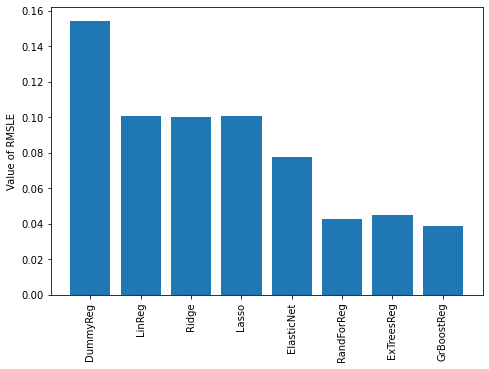

In [22]:
modelsErrors = {'DummyReg': DummyRegressorError, 'LinReg': LinearRegressionError, 'Ridge': RidgeError, 'Lasso': LassoError, 'ElasticNet': ElasticNetError, 'RandForReg': RandomForestRegressorError, 'ExTreesReg': ExtraTreesRegressorError, 'GrBoostReg': GradientBoostingRegressorError}

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(modelsErrors.keys(),modelsErrors.values())
plt.ylabel('Value of RMSLE')
plt.xticks(rotation='vertical')
plt.show()

## Wnioski
* Jak należało przewidywać, wykorzystanie prostych reguł, z których korzysta $\textit{DummyRegressor}$ daje najgorsze wyniki spośród wszystkich zastosowanych metod. Ten model został przedstawiony w celach porównawczych.
* Zastosowane trzy podstawowe modele liniowe ($\textit{LinearRegressor}$, $\textit{Ridge}$, $\textit{Lasso}$) osiągając bardzo podobne wyniki zmniejszając wartość błędu o około 33% w stosunku do najprostrzego z użytych modeli. Te modele oparte zostały o metodę najmniejszych kwadratów.
* Zmniejszenie błędu o niemalże 50% uzyskane zostało przy użyciu modelu $\textit{ElasticNet}$. Jest to również model liniowy, jednak posiada dodatkowo zaimplementowany mechanizm wyboru zmiennych. Usunięcie zbędnych, nadmiarowych lub obarczonych dużym odchyleniem przewidywań pozwala na dokładniejsze uogólnienie.
* Najlepsze wyniki zostały uzyskane w przypadku złożnych modeli ($\textit{RandomForestRegressor}$, $\textit{ExtraTreesRegressor}$, $\textit{GradientBoostRegressor}$).
* Przeprowadzone procesy uczenia pokazują, że bardziej zaawansowane metody pozwalają osiągnąć lepsze efekty. Analizowany proces jest złożony i uwzględnia wiele różnych cech sprzedawanych domów, przez co dokładne odwzorowanie nie jest możliwe z wykorzystaniem prostych modeli.


## Wizualizacja przewidywań cen domów
Poniżej zostało pokazane kilka przykładowych predykcji dla danych ze zbioru walidacyjnego. Należy dokonwać wyboru modelu oraz ilości wizualizowanych danych.

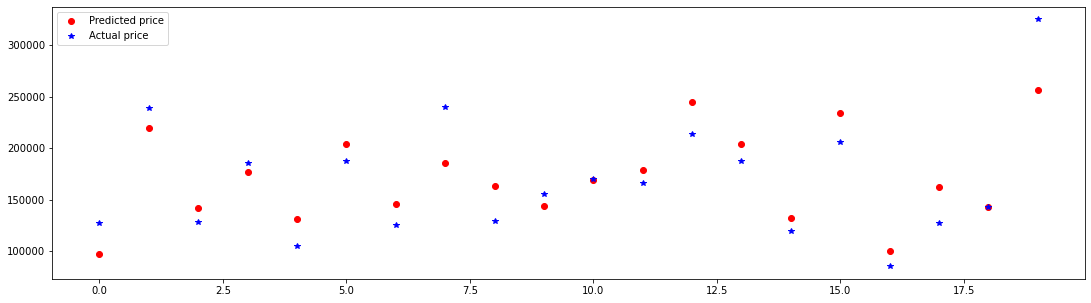

In [25]:
import random as rd

## wybor modelu do wizualizacji wyników
# houses_sale_model = LinearRegression() 
# houses_sale_model = Ridge() 
# houses_sale_model = Lasso()
# houses_sale_model = ElasticNet()
# houses_sale_model = RandomForestRegressor() 
houses_sale_model = GradientBoostingRegressor()

## wybor ilosci wizualizowanych danych
howMuchData = 20    #podac liczbe typu int


houses_sale_model.fit(x_train, y_train)
temp = houses_sale_model.predict(x_valid)

y_pred = [0]
y_check = [0]
rowNumberRange = 200

for i in range(howMuchData):
    rowNumber = (rd.randint(0, rowNumberRange))
    if(i >= len(y_pred)):
        rowNumber = (rd.randint(0, rowNumberRange))
        y_pred.append(int(temp[rowNumber]))
        y_check.append(y_valid.iloc[rowNumber])
    else:
        y_pred[i] = int(temp[rowNumber])
        y_check[i] = y_valid.iloc[rowNumber]

fig = plt.figure()
fig.set_size_inches(18.5, 5)
redPlot, = plt.plot(y_pred,'ro', label = 'Predicted price')
bluePlot, = plt.plot(y_check, 'b*', label = 'Actual price')
plt.legend(handles = [redPlot, bluePlot])
plt.show()

Obserwacje poczynione podczas wizualizacji danych w komórce powyżej potwierdzają wnioski płynące z prezentacji wyników - najlepszym z przetestowanych modeli jest GradientBoostingRegressor().



## Najlepsze dopasowanie dla zbioru testowego

In [24]:
houses_sale_model = GradientBoostingRegressor()
houses_sale_model.fit(x_train, y_train)

y_pred = houses_sale_model.predict(x_test.head(10))

testSet = pd.DataFrame(x_test.head(10))
testSet["Sale Price"] = pd.DataFrame(y_pred)
testSet

,LotArea,Street,LandContour,Neighborhood,OverallCond,YearBuilt,ExterCond,Heating,GarageCars,Sale Price
0,11622,2,1,13,6,1961,3,2,1.0,147494.238030
1,14267,2,1,13,6,1958,3,2,1.0,160903.058245
2,13830,2,1,9,5,1997,3,2,2.0,204169.097639
3,9978,2,1,9,6,1998,3,2,2.0,195607.189592
4,5005,2,3,23,5,1992,3,2,2.0,230421.778661
5,10000,2,1,9,5,1993,3,2,2.0,190952.048219
6,7980,2,1,9,7,1992,2,2,2.0,179612.488147
7,8402,2,1,9,5,1998,3,2,2.0,181862.870275
8,10176,2,1,9,5,1990,3,2,2.0,190062.691227
9,8400,2,1,13,5,1970,3,2,2.0,138856.726931
